# Flujo internacional de Migrantes hacia Canada años 1980 a 2013

Inmigración a Canadá de 1980 a 2013 - [Flujos migratorios internacionales hacia y desde países seleccionados - Revisión de 2015](https://www.un.org/development/desa/pd/data/international-migration-flows) del sitio web de las Naciones Unidas.<br>
En este laboratorio, nos centraremos en los datos de inmigración canadiense y utilizaremos el *conjunto de datos ya depurado*, que se puede obtener desde <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">aquí</a>.

## Objetivos

1. Leer y almacenar el conjunto de datos utilizando Pandas, con el fin de preparar los datos para análisis gráfico.
2. Realizar gráficas de tipo lineplot con Matplotlib, mostrando tendencias en los paises con mayor flujo de inmigración hacia Canada.
3. Utilizar las diferentes funcionalidades de Matplotlib para contrastar diferentes trazas en un mismo gráfico, evidenciando información de interés con el propósito de encontrar Insights.

## Importar Librerías

In [3]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib.pyplot as plt

## Obtención de datos

In [5]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

Tomaremos un vista de las primeras 5 lineas del DataFrame

In [6]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Encontraremos cuantos registro y columnas tiene nuestro dataset

In [7]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


Ajustaremos Country Name como índice de nuestro dataset, es útil para obtener una mirada rápida con el método .loc

In [8]:
df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Finalmente, se creará una lista que equivalga al conjunto de años (1980 - 2013) con el fin de manipular fácil y rápidamente nuestros datos.

In [12]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

## Line Plot

Un gráfico de líneas muestra la relación entre dos variables continuas en un intervalo continuo, mostrando la tendencia o patrón de los datos.<br><br>Creemos un gráfico de líneas para visualizar la tendencia de los inmigrantes (a Canadá) durante 1980 a 2013.<br>Necesitamos el total de inmigrantes por año.<br><br>Crearemos un nuevo marco de datos solo para las columnas que contienen los años.<br>Luego, aplicaremos sum() en el marco de datos.<br><br>Puede crear un gráfico de líneas directamente en los **ejes** llamando a la función de gráfico **plot()**.

In [13]:
#creating df with only years columns from 1980 - 2013
df_line=df_can[years]

#Applying sum to get total immigrants year-wise
total_immigrants=df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

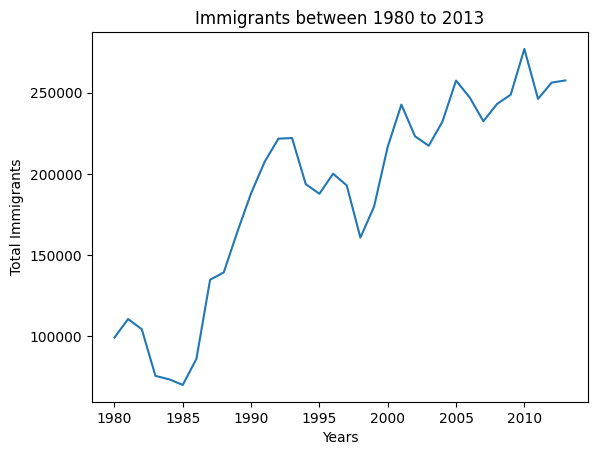

In [15]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Plot the line
ax.plot(total_immigrants)

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 
#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#Display the plot
plt.show()

Ahora, ajustaremos con mejor apariencia la grafica.

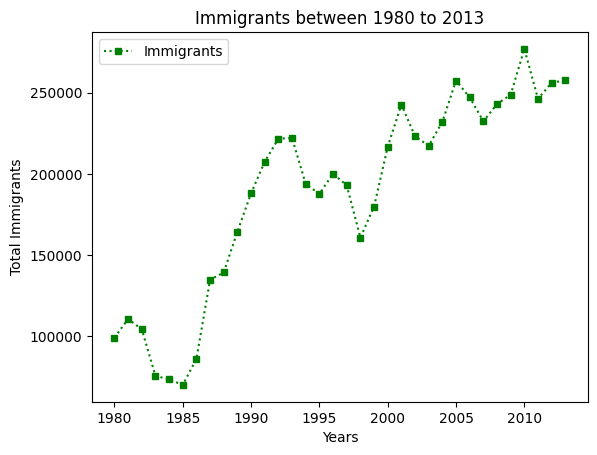

In [16]:
#Create figure and axes
fig, ax = plt.subplots()

#Changing the index type to integer
total_immigrants.index = total_immigrants.index.map(int)

# Customizing the appearance of Plot
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle=":") #Changing the line style to a Dotted line
#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend(['Immigrants'])

plt.show()

Ahora, incluiremos una grilla de fondo, una leyenda y ajustaremos los límites del eje x.

In [ ]:
#Create figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(total_immigrants, 
        marker='s', #Including markers in squares shapes
        markersize=5, #Setting the size of the marker
        color='green', #Changing the color of the line
        linestyle="dotted") #Changing the line style to a Dotted line

#Setting up the Title
ax.set_title('Immigrants between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

#limits on x-axis
plt.xlim(1975, 2015)  #or ax.set_xlim()

#Enabling Grid
plt.grid(True)  #or ax.grid()

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

#Display the plot
plt.show()

**Comencemos con un estudio de caso:**

En 2010, Haití sufrió un catastrófico terremoto de magnitud 7,0. El terremoto causó una devastación generalizada y pérdida de vidas y aproximadamente tres millones de personas se vieron afectadas por este desastre natural. Como parte del esfuerzo humanitario de Canadá, el Gobierno de Canadá intensificó sus esfuerzos para aceptar refugiados de Haití. Podemos visualizar rápidamente este esfuerzo utilizando un gráfico de líneas:

### Pregunta: Dibuje un gráfico de líneas de inmigración desde Haití.

- Crear un marco de datos donde el nombre del "País" sea igual a "Haití" y los años sean de 1980 a 2013.
- Transponer el nuevo marco de datos a una serie para trazar.
- Cambiar el tipo de índice de la serie a entero para ver mejor el gráfico.
- Crear fig y ax y llame a la función plot() en los datos.

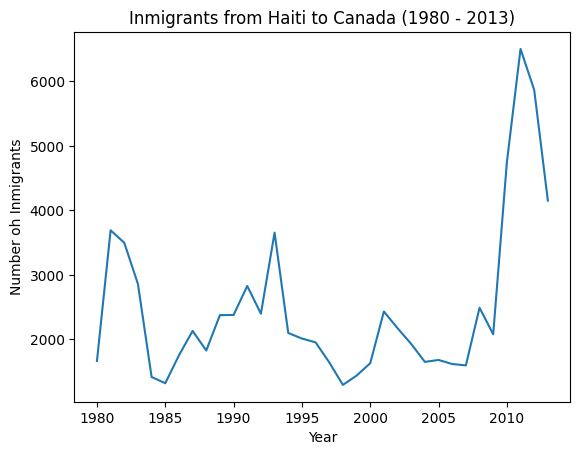

In [18]:
# creating data to plot
haiti = df_can.loc['Haiti', years]
haiti.index = haiti.index.map(int)

# Plotting the line plot on the data
fig, ax = plt.subplots()
ax.plot(haiti)

# Setting up the labels
ax.set_xlabel('Year')
ax.set_ylabel('Number oh Inmigrants')
ax.set_title('Inmigrants from Haiti to Canada (1980 - 2013)')

plt.show()

#### Podemos observar claramente cómo el número de inmigrantes de Haití aumentó a partir de 2010, cuando Canadá intensificó sus esfuerzos para aceptar refugiados de Haití. <br>Anotemos este aumento en el gráfico utilizando el método *ax.annotate()*.

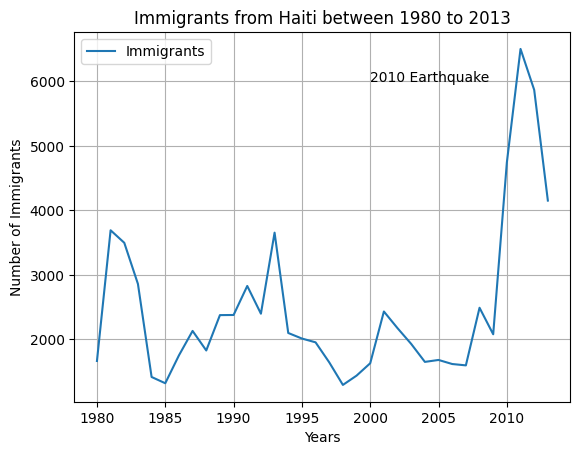

In [19]:
fig, ax = plt.subplots()

ax.plot(haiti)

#Setting up the Title
ax.set_title('Immigrants from Haiti between 1980 to 2013') 

#Setting up the Labels
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')

#Enabling Grid and ticks
plt.grid(True)  #or ax.grid()
#ax.set_xticks(list(range(n, m, s)))

#Legend
plt.legend(["Immigrants"]) #or ax.legend()

ax.annotate('2010 Earthquake',xy=(2000, 6000))
plt.show()

## Scatter Plot

Un diagrama de dispersión visualiza la relación entre dos variables continuas, mostrando puntos de datos individuales como puntos en un plano bidimensional, lo que permite el examen de patrones, grupos y correlaciones.

Creemos un *diagrama de dispersión* para visualizar la tendencia de inmigrantes (a Canadá) durante 1980 a 2013. Necesitamos el total de inmigrantes por año.

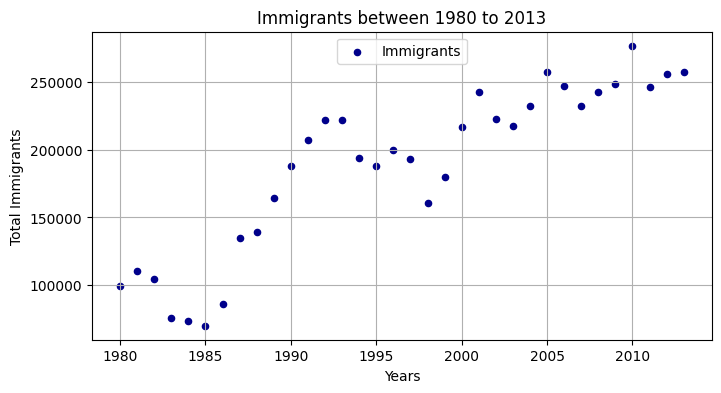

In [22]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

## Bar plot

Un gráfico de barras representa datos categóricos con barras rectangulares, donde la altura de cada barra corresponde al valor de una categoría específica, lo que lo hace adecuado para comparar valores entre diferentes categorías.

Creemos un gráfico de barras para visualizar los 5 países principales que aportaron la mayor cantidad de inmigrantes a Canadá desde 1980 hasta 2013.

Apliquemos la función sort_values ​​en la columna "Total" de nuestros datos.

Crearemos un nuevo marco de datos solo para las columnas que contienen los años.

Luego, aplicaremos sum() en el marco de datos y podremos crear un marco de datos separado para los cinco países principales. Además, puedes usar los nombres de los países para etiquetar cada barra en el gráfico

In [34]:
#Sorting the dataframe on 'Total' in descending order
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries with head function
df_top5 = df_can.head()

#Creating alist of names of the top 5 countries
label=list(df_top5.index)
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

##### El tercer nombre es demasiado largo para caber en el eje x como etiqueta. Arreglemos esto usando indexación

In [35]:
label[2]='UK'
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

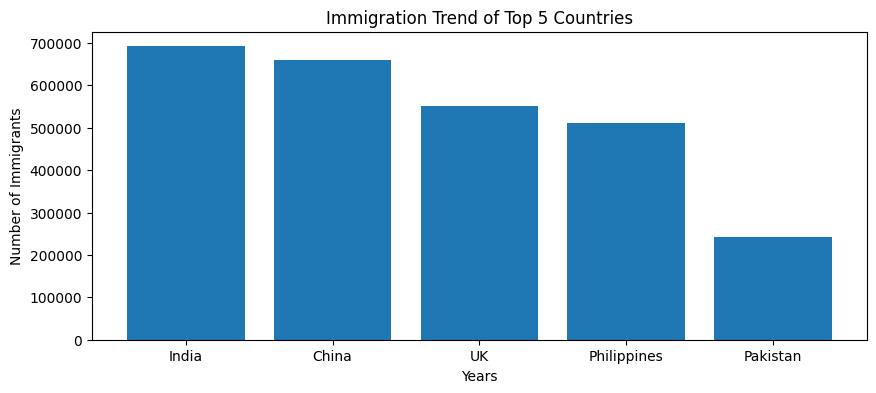

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label,df_bar_5['Total'], label=label)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

### Pregunta: Crear un gráfico de barras de los cinco países que contribuyeron **menos** a la inmigración a Canadá **entre** 1980 y 2013.

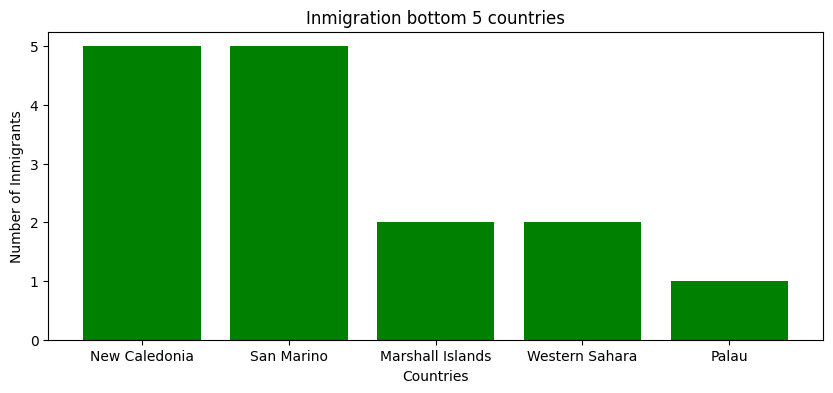

In [38]:
# get the bottom 5 entries with tail function
df_least5 = df_can.tail()

# reset index
df_least5 = df_least5.reset_index()

# Creating a list of names of the bottom5 countries

label = list(df_least5.Country)

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_least5['Total'], label=label, color='green')
ax.set_title('Inmigration bottom 5 countries')
ax.set_ylabel('Number of Inmigrants')
ax.set_xlabel('Countries')

plt.show()

## Histograma

Un histograma es una forma de representar la distribución de *frecuencias* de un conjunto de datos numéricos. Su funcionamiento consiste en dividir el eje x en *grupos*, asignar cada punto de datos de nuestro conjunto de datos a un grupo y, a continuación, contar la cantidad de puntos de datos que se han asignado a cada grupo. Por lo tanto, el eje y es la frecuencia o la cantidad de puntos de datos en cada grupo. Tenga en cuenta que podemos cambiar el tamaño del grupo y, por lo general, es necesario modificarlo para que la distribución se muestre correctamente.


Averigüemos cuál es la distribución de frecuencias de la cantidad (población) de nuevos inmigrantes de los distintos países que llegaron a Canadá en 2013.

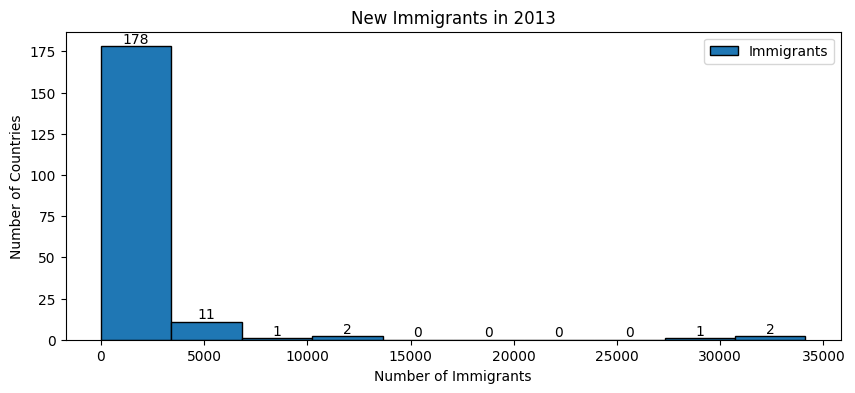

In [39]:
df_country = df_can.groupby(['Country'])['2013'].sum().reset_index()

#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(df_country['2013'], edgecolor='black') #We obtain the objects so that we can later place labels on each container.
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

# Add labels on each container
for i in range(len(patches)):
    #Obtain the center
    bin_centers = (bins[i] + bins[i+1])/2
    height = n[i]
    
    # Add text
    plt.text(bin_centers, height, f'{int(height)}', ha='center', va='bottom')
    
#Display the plot
plt.show()

#### También podemos trazar varios histogramas en el mismo gráfico. Por ejemplo, intentemos responder las siguientes preguntas utilizando un histograma.

#### ¿Cuál es la distribución de la inmigración en Dinamarca, Noruega y Suecia durante los años 1980 a 2013?

In [40]:
# let's quickly view the dataset
df = df_can.groupby(['Country'])[years].sum()
df_dns = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns = df_dns.T
df_dns

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


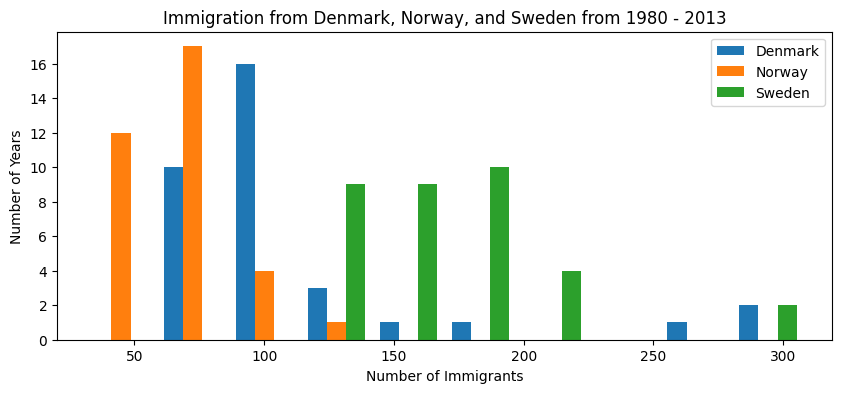

In [41]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title('Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])
#Display the plot
plt.show()

## Pie Chart

Un gráfico circular representa la proporción o la distribución porcentual de diferentes categorías en un conjunto de datos utilizando sectores de un gráfico circular.

Crearemos un gráfico circular que represente el total de inmigrantes del año 1980 al 1985

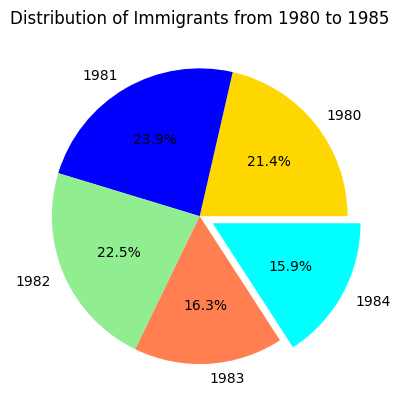

In [42]:
fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total_immigrants[0:5],
       labels=years[0:5],
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1]) #using explode to highlight the lowest

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels
plt.show()

### Pregunta: Crea un gráfico circular que represente la proporción total de inmigrantes en cada continente.

Primero, tendrás que agrupar los datos por continente y obtener la suma del total. Luego, puedes pasar estos datos a la función circular.

In [43]:
#Creating data for plotting pie
df_con=df_can.groupby('Continent')['Total'].sum().reset_index()
label=list(df_con.Continent)
label[3] = 'LAC'
label[4] = 'NA'
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


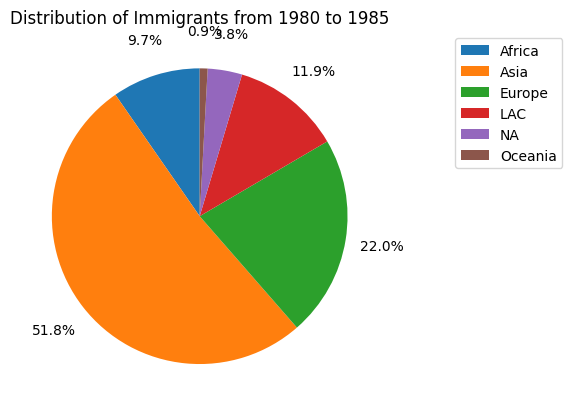

In [52]:
fig, ax=plt.subplots()

#Pie on immigrants
ax.pie(df_con['Total'],
       autopct='%1.1f%%',
       startangle=90,
       pctdistance=1.25
       )

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
plt.legend(label, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# Sub-plotting

Exploremos cómo mostrar más de un gráfico en la misma figura y especificar la cantidad de filas y columnas que se crearán en la función de subgráficos.

Por ejemplo, creemos un gráfico de líneas y de dispersión en una fila. 
plt.subplots()

Puede utilizar las mismas funciones con las que grafica los gráficos de líneas y de dispersión al comienzo de este laboratorio.

Ambos subgráficos compartirán el mismo eje y, ya que los datos en el eje y son los mismos. Por lo tanto, asigne el parámetro 'Sharey' como True en el código a continuación. Observe también el uso de 'suptitle'

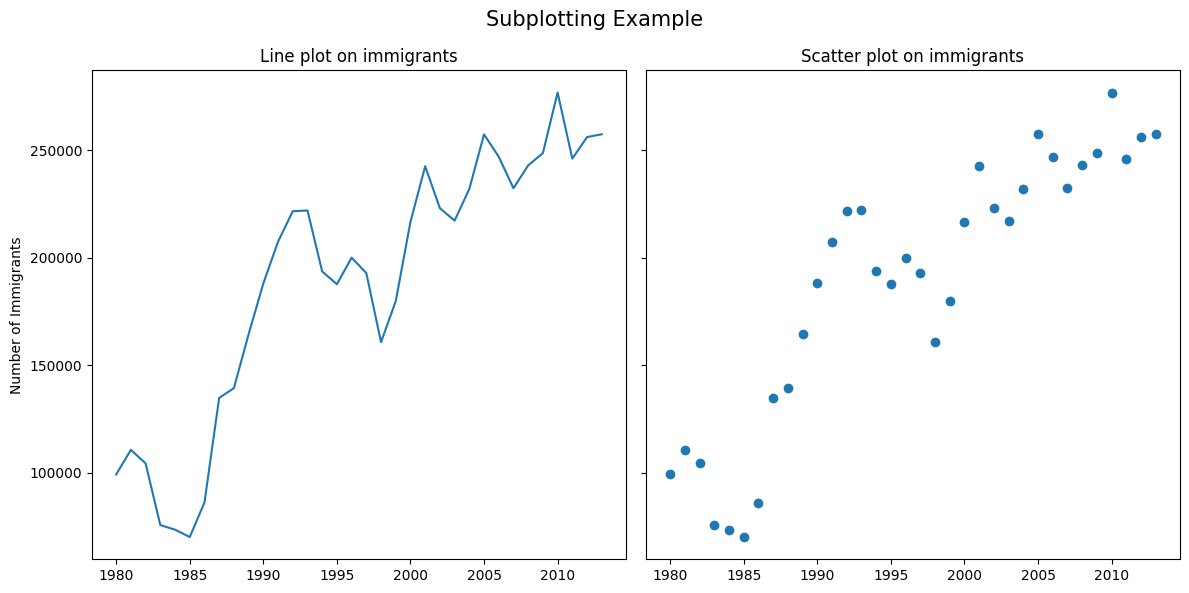

In [53]:
# Create a figure with two axes in a row
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

### Elejiremos cuatro gráficos que hemos desarrollado en este laboratorio y los mostraremos en una pantalla de 2x2.

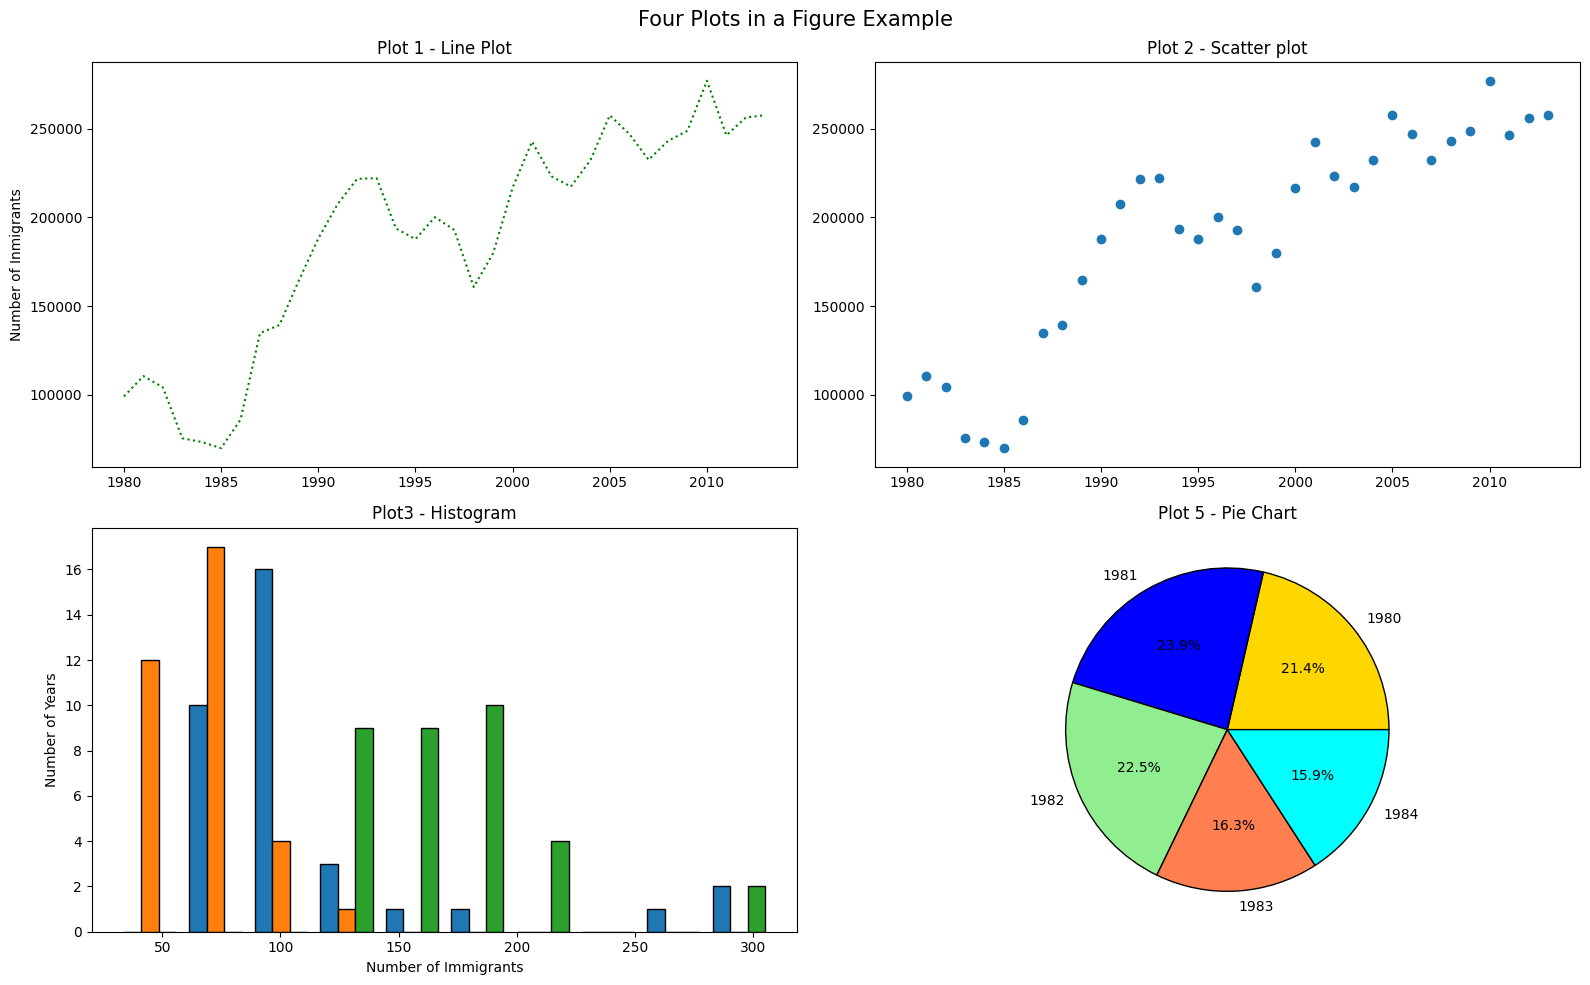

In [55]:
# Create a figure with Four axes - two rows, two columns
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Add the first subplot (top-left)
axs[0,0].plot(total_immigrants,
        linestyle=':',
        color='green'
        )
axs[0,0].set_title('Plot 1 - Line Plot')
axs[0,0].set_ylabel('Number of Inmigrants')

# Add the second subplot (top-right)
axs[0,1].scatter(total_immigrants.index, total_immigrants)
axs[0,1].set_title('Plot 2 - Scatter plot')

# Add the third subplot (bottom-left)
axs[1,0].hist(df_dns, edgecolor='black')
axs[1,0].set_title('Plot3 - Histogram') 
axs[1,0].set_xlabel('Number of Immigrants')
axs[1,0].set_ylabel('Number of Years')

# Add the fourth subplot (bottom-right)
axs[1,1].pie(total_immigrants[0:5], labels=years[0:5], 
        colors = ['gold','blue','lightgreen','coral','cyan'],
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}  # Agrega bordes negros a los segmentos
        )
axs[1,1].set_aspect('equal')  
axs[1,1].set_title('Plot 5 - Pie Chart')

#Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

## Author

[Jefferson Esquivel](https://www.linkedin.com/in/jefferson-esquivel-33a25318a)